___
___
___

<span style='color:blue'> <font size="8"> 
**Machine Learning in PyTorch** 
</font> </span>
___

This notebook provides an introduction to Machine Learning using PyTorch: an open-source neural networks library.
It consists of the following sections:

#### PyTorch Tensors
> * Tensor operations and gradients
> * Tensor functions
> * Interoperability with Numpy
#### Linear Regression and Gradient Descent 
> Linear regression from scratch
> * Loss function
> * Compute gradients
> * Adjust weights and biases to reduce the loss
> * Train the model using gradient descent
> * Train for multiple epochs
>
> Linear regression using PyTorch built-ins
> * Dataset and DataLoader
> * nn.Linear
> * Loss Function
> * Optimizer
> * Train the model
#### Logistic Regression for Images Classification
> * Training and validation datasets
> * Classification model
> * Evaluation metric and loss function
> * Training the model
> * Testing with individual images
> * Saving and loading the model

**Note 1:** This notebook is a living script that will be modified and extended continuously. 

**Note 2:** While you can run this notebook in VS, you will get the best outcome by running it in Jupyter.

<span style='color:Red'> **Disclaimer:** The materials in this notebook are replicated from different online sources, and thus intends for individual upskilling only, not for corporate or commercial distribution. </span>

### Machine learning vs. classical programming

<div>
<img src="notebook_images\mlprogramming.png" align="right" width="400"/>
</div>

Usually, we write programs that take some inputs, perform some operations, and return a result. Here, however, we define a "model" that assumes a specific relationship between the inputs and the outputs, expressed using some unknown parameters (weights and biases). We then show the model some known inputs-outputs and train the model to come up with good values for the unknown parameters. Once trained, the model can be used to compute the outputs for new inputs. 

This paradigm of programming is known as *machine learning,* where we use data to figure out the relationship between inputs and outputs. Here is the picture from the book [Deep Learning with Python](https://www.manning.com/books/deep-learning-with-python) by Francois Chollet that captures this difference between classical programming and machine learning.

*Deep learning* is a branch of machine learning that uses matrix operations, non-linear activation functions, and gradient descent to build and train models. Andrej Karpathy, the director of AI at Tesla Motors, has written a great blog post on this topics, titled [Software 2.0.](https://karpathy.medium.com/software-2-0-a64152b37c35)

___
# <span style='color:Blue'> PyTorch Tensors </span>

PyTorch is a library for processing tensors. A tensor is a number, vector, matrix, or any n-dimensional array. Let's create a tensor with a single number:

In [1]:
import torch

In [2]:
t1 = torch.tensor(4.)
t1

tensor(4.)

Note that $4.$ is a shorthand for $4.0$ that is used to indicate to Python (and PyTorch) that you want to create a floating-point number. We can verify this by checking the dtype attribute of our tensor:

In [3]:
t1.dtype

torch.float32

Tensors can have any number of dimensions and different lengths along each dimension. We can inspect the length along each dimension using the `.shape` property of a tensor. Let's try creating some more complex tensors:

In [4]:
t2 = torch.tensor([1., 2, 3])
t2

tensor([1., 2., 3.])

In [5]:
t3 = torch.tensor([[5., 6],
                   [7, 8],
                   [9, 10]])
t3

tensor([[ 5.,  6.],
        [ 7.,  8.],
        [ 9., 10.]])

In [6]:
t3.shape

torch.Size([3, 2])

In [7]:
t4 = torch.tensor([[[11, 12],
                    [13, 14],
                    [15, 16]],
                   [[21, 22],
                    [23, 24],
                    [25, 26.]]])
t4

tensor([[[11., 12.],
         [13., 14.],
         [15., 16.]],

        [[21., 22.],
         [23., 24.],
         [25., 26.]]])

In [8]:
t4.shape

torch.Size([2, 3, 2])

In [9]:
print(f' t1 = {t1} \n t2 = {t2} \n t3 = {t3} \n t4 = {t4}')

 t1 = 4.0 
 t2 = tensor([1., 2., 3.]) 
 t3 = tensor([[ 5.,  6.],
        [ 7.,  8.],
        [ 9., 10.]]) 
 t4 = tensor([[[11., 12.],
         [13., 14.],
         [15., 16.]],

        [[21., 22.],
         [23., 24.],
         [25., 26.]]])


### Tensor operations and [gradients](https://storage.googleapis.com/supplemental_media/udacityu/315142919/Gradient%20Descent.pdf)
Tensors work with general arithmetic operations:

In [10]:
x = torch.tensor(3., requires_grad=True)
w = torch.tensor(4., requires_grad=True)
b = torch.tensor(5.)

In [11]:
y = w * x + b
y

tensor(17., grad_fn=<AddBackward0>)

As expected, $y$ is a tensor with the value 3 * 4 + 5 = 17. What makes PyTorch unique is that we can automatically compute the derivative of $y$ w.r.t. the tensors that have `requires_grad` set to `True`, i.e., $x$ and $w$. This feature of PyTorch is called autograd (automatic gradients).

To compute the derivatives, we can invoke the `.backward` method on our result $y$ :

In [12]:
y.backward()

The derivatives of $y$ with respect to the input tensors are stored in the `.grad` property of the respective tensors:

In [13]:
# Display gradients
print('dy/dx:', x.grad)
print('dy/dw:', w.grad)
print('dy/db:', b.grad)

dy/dx: tensor(4.)
dy/dw: tensor(3.)
dy/db: None


As expected, $dy/dx$ has the same value as $w=4$, and $dy/dw$ has the value $3$. Note that `b.grad` is `None` because $b$ doesn't have `requires_grad` set to True.

### Tensor functions
Apart from arithmetic operations, the torch module also contains many functions for creating and manipulating tensors. Here are some examples and learn more at https://pytorch.org/docs/stable/torch.html 

In [14]:
# Create a tensor with a fixed value for every element
t6 = torch.full((3, 2), 42.)
t6

tensor([[42., 42.],
        [42., 42.],
        [42., 42.]])

In [15]:
# Concatenate two tensors with compatible shapes
t7 = torch.cat((t3, t6))
t7

tensor([[ 5.,  6.],
        [ 7.,  8.],
        [ 9., 10.],
        [42., 42.],
        [42., 42.],
        [42., 42.]])

In [16]:
# Compute the sin of each element
t8 = torch.sin(t7)
t8

tensor([[-0.9589, -0.2794],
        [ 0.6570,  0.9894],
        [ 0.4121, -0.5440],
        [-0.9165, -0.9165],
        [-0.9165, -0.9165],
        [-0.9165, -0.9165]])

In [17]:
# Change the shape of a tensor
t9 = t8.reshape(3, 2, 2)
t9

tensor([[[-0.9589, -0.2794],
         [ 0.6570,  0.9894]],

        [[ 0.4121, -0.5440],
         [-0.9165, -0.9165]],

        [[-0.9165, -0.9165],
         [-0.9165, -0.9165]]])

### Interoperability with Numpy
The interoperability between PyTorch and Numpy is essential because most datasets will likely be read and preprocessed as Numpy arrays.

We might wonder why to need a library like PyTorch at all since Numpy already provides data structures and utilities for working with multi-dimensional numeric data. There are two main reasons:

> **Autograd:** The ability to automatically compute gradients for tensor operations is essential for training deep learning models.
>
> **GPU support:** PyTorch tensor operations can perform efficiently using GPU. 

In [18]:
import numpy as np

x = np.array([[1, 2], [3, 4.]])
x

array([[1., 2.],
       [3., 4.]])

In [19]:
# Convert the numpy array to a torch tensor.
y = torch.from_numpy(x)
y

tensor([[1., 2.],
        [3., 4.]], dtype=torch.float64)

In [20]:
x.dtype, y.dtype

(dtype('float64'), torch.float64)

In [21]:
# Convert a torch tensor to a numpy array
z = y.numpy()
z

array([[1., 2.],
       [3., 4.]])

___
# <span style='color:Blue'> Linear Regression and Gradient Descent </span>

We'll create a model that predicts crop yields for apples and oranges (target variables) by looking at the average temperature, rainfall, and humidity (input variables or features) in a region. Here's the training data: 

<div>
<img src="notebook_images\data_table.png" width="500"/>
</div>

In a [linear regression model,](https://hackernoon.com/visualizing-linear-regression-with-pytorch-9261f49edb09) each target variable is estimated to be a weighted sum of the input variables, offset by some constant, known as a bias:
>$\text{yield_apple}  = w_{11} * \text{temp} + w_{12} * \text{rainfall} + w_{13} * \text{humidity} + b_1$
>$\text{yield_orange} = w_{21} * \text{temp} + w_{22} * \text{rainfall} + w_{23} * \text{humidity} + b_2$

To make better predictions, we'll train our model by adjusting the weights slightly in many times, using [gradient descent.](https://storage.googleapis.com/supplemental_media/udacityu/315142919/Gradient%20Descent.pdf) 

## <span style='color:Darkblue'> Linear regression from scratch </span>

In [22]:
import numpy as np
import torch

In [23]:
# Input (temp, rainfall, humidity)
inputs = np.array([[73, 67, 43], 
                   [91, 88, 64], 
                   [87, 134, 58], 
                   [102, 43, 37], 
                   [69, 96, 70]], dtype='float32')

In [24]:
# Targets (apples, oranges)
targets = np.array([[56, 70], 
                    [81, 101], 
                    [119, 133], 
                    [22, 37], 
                    [103, 119]], dtype='float32')

In [25]:
# Convert inputs and targets to tensors
inputs = torch.from_numpy(inputs)
targets = torch.from_numpy(targets)
print(inputs)
print(targets)

tensor([[ 73.,  67.,  43.],
        [ 91.,  88.,  64.],
        [ 87., 134.,  58.],
        [102.,  43.,  37.],
        [ 69.,  96.,  70.]])
tensor([[ 56.,  70.],
        [ 81., 101.],
        [119., 133.],
        [ 22.,  37.],
        [103., 119.]])


The weights and biases $(w_{11}, w_{12},... w_{23}, b_1, b_2)$ can be represented as matrices, initialized as random values. The first row of $w$ and the first element of $b$ are used to predict the first target variable, i.e., yield of apples, and the second one for oranges.

In [26]:
# Weights and biases
w = torch.randn(2, 3, requires_grad=True)
b = torch.randn(2, requires_grad=True)
print(w)
print(b)

tensor([[ 1.1136,  0.1024,  2.5019],
        [-0.7827,  1.6874, -0.9223]], requires_grad=True)
tensor([-1.8338,  1.3309], requires_grad=True)


<div>
<img src="notebook_images\matrix.png" align="right" width="350"/>
</div>

Our model is simply a function that performs a matrix multiplication of the inputs and the weights $w$ (transposed) and adds the bias $b$ (replicated for each observation).

We can define the model as follows, where $@$ represents matrix multiplication in PyTorch, and the `.t` method returns the transpose of a tensor:

In [27]:
def model(x):
    return x @ w.t() + b

In [28]:
# Generate predictions
preds = model(inputs)
print(preds)

tensor([[193.9070,  17.5852],
        [268.6439,  19.5620],
        [253.8896, 105.8452],
        [208.7325, -40.0765],
        [259.9749,  44.7469]], grad_fn=<AddBackward0>)


In [29]:
# Compare with actual targets
print(targets)

tensor([[ 56.,  70.],
        [ 81., 101.],
        [119., 133.],
        [ 22.,  37.],
        [103., 119.]])


There is a big difference between our model's predictions and the actual targets because we've initialized our model with random weights and biases. Obviously, we can't expect a randomly initialized model to just work.

### Loss function
We can compare the model's predictions with the actual targets by calculating mean squared error (MSE):
1. Calculate the difference between the two matrices (preds and targets)
1. Square all elements of the difference matrix to remove negative values
1. Calculate the average of the elements in the resulting matrix

In [30]:
# MSE loss
def mse(t1, t2):
    diff = t1 - t2
    return torch.sum(diff * diff) / diff.numel()

Method `torch.sum` returns the sum of all the elements in a tensor, and $.numel$ returns the number of elements in a tensor.

In [31]:
# Compute loss
loss = mse(preds, targets)
print(loss)

tensor(15350.5098, grad_fn=<DivBackward0>)


### Compute gradients
With PyTorch, we can automatically compute the gradient or derivative of the loss w.r.t. to the weights and biases because they have `requires_grad` set to True. 

In [32]:
# Compute gradients
loss.backward()

The gradients are stored in the `.grad` property of the respective tensors. Note that the derivative of the loss w.r.t. the weights matrix is itself a matrix with the same dimensions.

In [33]:
# Gradients for weights
print(w)
print(w.grad)

tensor([[ 1.1136,  0.1024,  2.5019],
        [-0.7827,  1.6874, -0.9223]], requires_grad=True)
tensor([[13751.2383, 13385.3457,  8732.0303],
        [-5316.9761, -4951.9346, -3418.0798]])


### Adjust weights and biases to reduce the loss

<div>
<img src="notebook_images\gradient.png" align="right" width="400"/>
</div>

The loss is a quadratic function of our weights and biases, and our objective is to find the set of weights where the loss is the lowest. If we plot a graph of the loss w.r.t any individual weight or bias element, it will look like the figure shown here. An important insight from calculus is that the gradient indicates the rate of change of the loss, i.e., the loss function's slope w.r.t. the weights and biases.

If a gradient element is positive (resp. negative):
* Increasing the weight element's value slightly will increase (resp. decrease) the loss
* Decreasing the weight element's value slightly will decrease (resp. increase) the loss

The increase or decrease in the loss by changing a weight element is proportional to the gradient of the loss w.r.t. that element. This observation forms the basis of the gradient descent optimization algorithm that we'll use to improve our model (by descending along the gradient).

We can subtract from each weight element a small quantity proportional to the derivative of the loss w.r.t. that element to reduce the loss slightly.



In [34]:
with torch.no_grad():
    w -= w.grad * 1e-5
    b -= b.grad * 1e-5

We multiply the gradients with a very **small** number ($10^{-5}$ in this case) to ensure that we don't modify the weights by a very large amount. We want to take a small step in the downhill direction of the gradient, not a giant leap. This number is called the learning rate of the algorithm.

We use `torch.no_grad` to indicate to PyTorch that we shouldn't track, calculate, or modify gradients while updating the weights and biases.

In [35]:
# Let's verify that the loss is actually lower
loss = mse(preds, targets)
print(loss)

tensor(15350.5098, grad_fn=<DivBackward0>)


Before we proceed, we reset the gradients to zero by invoking the `.zero_()` method. We need to do this because PyTorch accumulates gradients. Otherwise, the next time we invoke `.backward` on the loss, the new gradient values are added to the existing gradients, which may lead to unexpected results.

In [36]:
w.grad.zero_()
b.grad.zero_()
print(w.grad)
print(b.grad)

tensor([[0., 0., 0.],
        [0., 0., 0.]])
tensor([0., 0.])


### Train the model using gradient descent
By reducing the loss, we improve our model using the gradient descent optimization algorithm. Thus, we can train the model using the following steps:

1. Generate predictions
1. Calculate the loss
1. Compute gradients w.r.t the weights and biases
1. Adjust the weights by subtracting a small quantity proportional to the gradient
1. Reset the gradients to zero

Let's implement these step by step:

In [37]:
# Generate predictions
preds = model(inputs)
print(preds)

tensor([[171.1441,  26.2548],
        [238.7610,  30.9463],
        [218.9235, 119.0897],
        [185.7181, -31.2585],
        [231.5226,  55.5627]], grad_fn=<AddBackward0>)


In [38]:
# Calculate the loss
loss = mse(preds, targets)
print(loss)

tensor(10715.1270, grad_fn=<DivBackward0>)


In [39]:
# Compute gradients
loss.backward()
print(w.grad)
print(b.grad)

tensor([[11404.4854, 10873.0850,  7179.5234],
        [-4423.6055, -3996.9465, -2827.4907]])
tensor([133.0139, -51.8810])


Let's update the weights and biases using the gradients computed above:

In [40]:
# Adjust weights & reset gradients
with torch.no_grad():
    w -= w.grad * 1e-5
    b -= b.grad * 1e-5
    w.grad.zero_()
    b.grad.zero_()

Let's take a look at the new weights and biases:

In [41]:
print(w)
print(b)

tensor([[ 0.8621, -0.1402,  2.3428],
        [-0.6853,  1.7768, -0.8599]], requires_grad=True)
tensor([-1.8368,  1.3321], requires_grad=True)


With the new weights and biases, the model should have a lower loss:

In [42]:
# Calculate loss
preds = model(inputs)
loss = mse(preds, targets)
print(loss)

tensor(7587.7061, grad_fn=<DivBackward0>)


We have already achieved a significant reduction in the loss merely by adjusting the weights and biases slightly using gradient descent.

### Train for multiple epochs
To reduce the loss further, we can repeat the process of adjusting the weights and biases using the gradients multiple times. Each iteration is called an **epoch.** Let's train the model for 100 epochs:

In [43]:
# Train for 100 epochs
for i in range(100):
    preds = model(inputs)
    loss = mse(preds, targets)
    loss.backward()
    with torch.no_grad():
        w -= w.grad * 1e-5
        b -= b.grad * 1e-5
        w.grad.zero_()
        b.grad.zero_()

Once again, let's verify that the loss is now lower:

In [44]:
# Calculate loss
preds = model(inputs)
loss = mse(preds, targets)
print(loss)

tensor(475.9827, grad_fn=<DivBackward0>)


The loss is now much lower than its initial value. Let's look at the model's predictions and compare them with the targets:

In [45]:
# Predictions
preds

tensor([[ 61.7769,  68.6347],
        [ 96.8936,  86.3662],
        [ 77.8710, 168.1861],
        [ 50.8474,  24.6572],
        [109.7359, 101.7289]], grad_fn=<AddBackward0>)

In [46]:
# Targets
targets

tensor([[ 56.,  70.],
        [ 81., 101.],
        [119., 133.],
        [ 22.,  37.],
        [103., 119.]])

The predictions are now quite close to the target variables. We can get even better results by training for a few more epochs.

___
## <span style='color:darkBlue'> Linear regression using PyTorch built-ins </span>

We've implemented linear regression & gradient descent model using some basic tensor operations. However, since this is a common pattern in deep learning, PyTorch provides several built-in functions and classes to make it easy to create and train models with just a few lines of code.

Let's begin by importing the `torch.nn` package from PyTorch, which contains utility classes for building neural networks:

In [47]:
import torch.nn as nn

As before, we represent the inputs and targets as matrices:

In [48]:
# Input (temp, rainfall, humidity)
inputs = np.array([[73, 67, 43], 
                   [91, 88, 64], 
                   [87, 134, 58], 
                   [102, 43, 37], 
                   [69, 96, 70], 
                   [74, 66, 43], 
                   [91, 87, 65], 
                   [88, 134, 59], 
                   [101, 44, 37], 
                   [68, 96, 71], 
                   [73, 66, 44], 
                   [92, 87, 64], 
                   [87, 135, 57], 
                   [103, 43, 36], 
                   [68, 97, 70]], 
                  dtype='float32')

# Targets (apples, oranges)
targets = np.array([[56, 70], 
                    [81, 101], 
                    [119, 133], 
                    [22, 37], 
                    [103, 119],
                    [57, 69], 
                    [80, 102], 
                    [118, 132], 
                    [21, 38], 
                    [104, 118], 
                    [57, 69], 
                    [82, 100], 
                    [118, 134], 
                    [20, 38], 
                    [102, 120]], 
                   dtype='float32')

inputs = torch.from_numpy(inputs)
targets = torch.from_numpy(targets)

In [49]:
inputs

tensor([[ 73.,  67.,  43.],
        [ 91.,  88.,  64.],
        [ 87., 134.,  58.],
        [102.,  43.,  37.],
        [ 69.,  96.,  70.],
        [ 74.,  66.,  43.],
        [ 91.,  87.,  65.],
        [ 88., 134.,  59.],
        [101.,  44.,  37.],
        [ 68.,  96.,  71.],
        [ 73.,  66.,  44.],
        [ 92.,  87.,  64.],
        [ 87., 135.,  57.],
        [103.,  43.,  36.],
        [ 68.,  97.,  70.]])

We are using 15 training examples to illustrate how to work with large datasets in small batches.

### Dataset and DataLoader
We'll create a `TensorDataset`, which allows access to rows from inputs and targets as tuples, and provides standard APIs for working with many different types of datasets in PyTorch.

In [50]:
from torch.utils.data import TensorDataset

In [51]:
# Define dataset
train_ds = TensorDataset(inputs, targets)
train_ds[0:3]

(tensor([[ 73.,  67.,  43.],
         [ 91.,  88.,  64.],
         [ 87., 134.,  58.]]),
 tensor([[ 56.,  70.],
         [ 81., 101.],
         [119., 133.]]))

The `TensorDataset` allows us to access a small section of the training data using the array indexing notation ($[0:3]$ in the above code). It returns a tuple with two elements. The first element contains the input variables for the selected rows, and the second contains the targets.

We'll also create a DataLoader, which can split the data into batches of a predefined size while training. It also provides other utilities like shuffling and random sampling of the data.

In [52]:
from torch.utils.data import DataLoader

In [53]:
# Define data loader
batch_size = 5
train_dl = DataLoader(train_ds, batch_size, shuffle=True)

We can use the data loader in a for loop. Let's look at an example:

In [54]:
for xb, yb in train_dl:
    print(xb)
    print(yb)
    break

tensor([[ 74.,  66.,  43.],
        [102.,  43.,  37.],
        [ 88., 134.,  59.],
        [101.,  44.,  37.],
        [ 92.,  87.,  64.]])
tensor([[ 57.,  69.],
        [ 22.,  37.],
        [118., 132.],
        [ 21.,  38.],
        [ 82., 100.]])


In each iteration, the data loader returns one batch of data with the given batch size. If shuffle is set to True, it shuffles the training data before creating batches. Shuffling helps randomize the input to the optimization algorithm, leading to a faster reduction in the loss.

### nn.Linear
Instead of initializing the weights and biases manually, we can define the model using the `nn.Linear` class, which does it automatically.

In [55]:
# Define model
model = nn.Linear(3, 2)
print(model.weight)
print(model.bias)

Parameter containing:
tensor([[ 0.4134,  0.1265,  0.2805],
        [-0.5376, -0.2240,  0.4394]], requires_grad=True)
Parameter containing:
tensor([-0.3330, -0.2506], requires_grad=True)


PyTorch models also have a helpful `.parameters` method, which returns a list containing all the weights and bias matrices present in the model. For our linear regression model, we have one weight matrix and one bias matrix:

In [56]:
# Parameters
list(model.parameters())

[Parameter containing:
 tensor([[ 0.4134,  0.1265,  0.2805],
         [-0.5376, -0.2240,  0.4394]], requires_grad=True),
 Parameter containing:
 tensor([-0.3330, -0.2506], requires_grad=True)]

We can use the model to generate predictions in the same way as before:

In [57]:
# Generate predictions
preds = model(inputs)
preds

tensor([[ 50.3765, -35.6034],
        [ 66.3633, -40.7550],
        [ 68.8435, -51.5445],
        [ 57.6458, -48.4534],
        [ 59.9642, -28.0840],
        [ 50.6634, -35.9169],
        [ 66.5173, -40.0915],
        [ 69.5374, -51.6426],
        [ 57.3588, -48.1398],
        [ 59.8314, -27.1071],
        [ 50.5305, -34.9399],
        [ 66.6502, -41.0685],
        [ 68.6895, -52.2079],
        [ 57.7786, -49.4304],
        [ 59.6773, -27.7705]], grad_fn=<AddmmBackward>)

### Loss Function
Instead of defining a loss function manually, we can use the built-in loss function `mse_loss`. The `nn.functional` package contains many useful loss functions and several other utilities.

In [58]:
import torch.nn.functional as F

# Define loss function
loss_fn = F.mse_loss

Let's compute the loss for the current predictions of our model:

In [59]:
loss = loss_fn(model(inputs), targets)
print(loss)

tensor(10005.0010, grad_fn=<MseLossBackward>)


### Optimizer
Instead of manually manipulating the model's weights & biases using gradients, we can use the optimizer `optim.SGD` where SGD is short for "stochastic gradient descent". The term stochastic indicates that samples are selected in random batches instead of as a single group.

In [60]:
# Define optimizer
opt = torch.optim.SGD(model.parameters(), lr=1e-5)

Note that `model.parameters()` is passed as an argument to `optim.SGD` so that the optimizer knows which matrices should be modified during the update step. Also, we can specify a learning rate that controls the amount by which the parameters are modified.

### Train the model
We are now ready to train the model. We'll follow the same process to implement gradient descent:
1. Generate predictions
1. Calculate the loss
1. Compute gradients w.r.t the weights and biases
1. Adjust the weights by subtracting a small quantity proportional to the gradient
1. Reset the gradients to zero

The only change is that we'll work batches of data instead of processing the entire training data in every iteration. Let's define a utility function `fit` that trains the model for a given number of epochs:

In [61]:
# Utility function to train the model
def fit(num_epochs, model, loss_fn, opt, train_dl):
    
    # Repeat for given number of epochs
    for epoch in range(num_epochs):
        
        # Train with batches of data
        for xb,yb in train_dl:
            
            # 1. Generate predictions
            pred = model(xb)
            
            # 2. Calculate loss
            loss = loss_fn(pred, yb)
            
            # 3. Compute gradients
            loss.backward()
            
            # 4. Update parameters using gradients
            opt.step()
            
            # 5. Reset the gradients to zero
            opt.zero_grad()
        
        # Print the progress
        if (epoch+1) % 10 == 0:
            print('Epoch [{}/{}], Loss: {:.4f}'.format(epoch+1, num_epochs, loss.item()))

Some things to note above:

* We use the data loader defined earlier to get batches of data for every iteration.
* Instead of updating parameters (weights and biases) manually, we use `opt.step` to perform the update and `opt.zero_grad` to reset the gradients to zero.
* We've also added a log statement that prints the loss from the last batch of data for every 10th epoch to track training progress with `loss.item` returning the actual value stored in the loss tensor.

Let's train our model for 100 epochs:

In [62]:
fit(100, model, loss_fn, opt, train_dl)

Epoch [10/100], Loss: 377.3112
Epoch [20/100], Loss: 234.3885
Epoch [30/100], Loss: 144.5140
Epoch [40/100], Loss: 185.4665
Epoch [50/100], Loss: 115.7620
Epoch [60/100], Loss: 23.7280
Epoch [70/100], Loss: 34.0907
Epoch [80/100], Loss: 36.7893
Epoch [90/100], Loss: 17.9641
Epoch [100/100], Loss: 23.9500


Let's generate predictions using our model and verify that they're close to our targets.

In [63]:
# Generate predictions
preds = model(inputs)
preds

tensor([[ 58.3418,  70.9364],
        [ 81.5564, 101.0856],
        [117.1840, 130.7683],
        [ 28.9721,  41.0871],
        [ 96.1971, 117.4530],
        [ 57.2891,  69.9639],
        [ 81.2274, 101.2362],
        [117.4381, 131.4294],
        [ 30.0247,  42.0596],
        [ 96.9207, 118.5762],
        [ 58.0127,  71.0870],
        [ 80.5038, 100.1131],
        [117.5130, 130.6177],
        [ 28.2485,  39.9639],
        [ 97.2497, 118.4256]], grad_fn=<AddmmBackward>)

In [64]:
# Compare with targets
targets

tensor([[ 56.,  70.],
        [ 81., 101.],
        [119., 133.],
        [ 22.,  37.],
        [103., 119.],
        [ 57.,  69.],
        [ 80., 102.],
        [118., 132.],
        [ 21.,  38.],
        [104., 118.],
        [ 57.,  69.],
        [ 82., 100.],
        [118., 134.],
        [ 20.,  38.],
        [102., 120.]])

Indeed, the predictions are quite close to our targets. We have trained a reasonably good model to predict crop yields for apples and oranges by looking at the average temperature, rainfall, and humidity in a region. It can be used to make predictions of crop yields for new regions by passing a batch containing a single row of input:

In [65]:
model(torch.tensor([[75, 63, 44.]]))

tensor([[55.0896, 68.4003]], grad_fn=<AddmmBackward>)

The predicted yield of apples is 54.3 tons per hectare, and that of oranges is 68.3 tons per hectare.

___
# <span style='color:Blue'> Logistic Regression for Image Classification </span>

<div>
<img src="notebook_images\minist.png" align="right" width="175"/>
</div>

In this section, we'll use our existing knowledge of PyTorch and linear regression to solve a very different kind of problem: image classification. We'll use the famous [MNIST Handwritten Digits Database](https://en.wikipedia.org/wiki/MNIST_database) as our training dataset. It consists of $\text{28px}$ by $\text{28px}$ grayscale images of handwritten digits (0 to 9) and labels for each image indicating which digit it represents. Here in the figure are some sample images from the dataset.

We begin by installing and importing $torchvision which contains some utilities for working with image data. It also provides helper classes to download and import popular datasets like MNIST automatically.

In [66]:
import torch
import torchvision
from torchvision.datasets import MNIST

In [67]:
# Download training dataset
dataset = MNIST(root='data/', download=True)

When this statement is executed for the first time, it downloads the data to the `data/` directory next to the notebook and creates a PyTorch `Dataset`. On subsequent executions, the download is skipped as the data is already downloaded. Let's check the size of the dataset:

In [68]:
len(dataset)

60000

The dataset has 60,000 images that we'll use to train the model. There is also an additional test set of 10,000 images used for evaluating models and reporting metrics in papers and reports. We can create the test dataset using the MNIST class by passing `train=False` to the constructor.

In [69]:
test_dataset = MNIST(root='data/', train=False)
len(test_dataset)

10000

Let's look at a sample element from the training dataset:

In [70]:
dataset[0]

(<PIL.Image.Image image mode=L size=28x28 at 0x26EFC27DE88>, 5)

It's a pair, consisting of a $28 \times 28$ px image and a label. The image is an object of the class `PIL.Image.Image`, which is a part of the Python imaging library Pillow. We can view the image within Jupyter using `matplotlib`, the de-facto plotting and graphing library for data science in Python.

In [71]:
import matplotlib.pyplot as plt
%matplotlib inline

The statement `%matplotlib` inline indicates to Jupyter that we want to plot the graphs within the notebook. Without this line, Jupyter will show the image in a popup. Statements starting with `%` are called magic commands and are used to configure the behavior of Jupyter itself. You can find a full list of magic commands here: https://ipython.readthedocs.io/en/stable/interactive/magics.html

Let's look at a couple of images from the dataset:

Label: 1


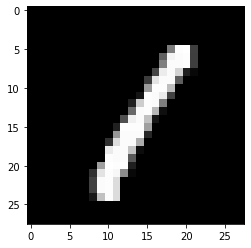

In [72]:
image, label = dataset[3]
plt.imshow(image, cmap='gray')
print('Label:', label)

Label: 5


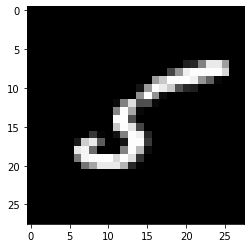

In [73]:
image, label = dataset[11]
plt.imshow(image, cmap='gray')
print('Label:', label)

It's evident that these images are relatively small in size, and recognizing the digits can sometimes be challenging even for the human eye. While it's useful to look at these images, there's just one problem here: PyTorch doesn't know how to work with images. We need to convert the images into tensors. We can do this by specifying a transform while creating our dataset.

In [74]:
import torchvision.transforms as transforms

PyTorch datasets allow us to specify one or more transformation functions that are applied to the images as they are loaded. The `torchvision.transforms` module contains many such predefined functions. We'll use the `ToTensor` transform to convert images into PyTorch tensors.

In [75]:
# MNIST dataset (images and labels)
dataset = MNIST(root='data/', 
                train=True,
                transform=transforms.ToTensor())

In [76]:
img_tensor, label = dataset[0]
print(img_tensor.shape, label)

torch.Size([1, 28, 28]) 5


The image is now converted to a $1\times 28\times 28$ tensor. The first dimension tracks color channels. The second and third dimensions represent pixels along the height and width of the image, respectively. Since images in the MNIST dataset are grayscale, there's just one channel. Other datasets have images with color, in which case there are three channels: red, green, and blue (RGB).

Let's look at some sample values inside the tensor:

In [77]:
print(img_tensor[0,10:15,10:15])
print(torch.max(img_tensor), torch.min(img_tensor))

tensor([[0.0039, 0.6039, 0.9922, 0.3529, 0.0000],
        [0.0000, 0.5451, 0.9922, 0.7451, 0.0078],
        [0.0000, 0.0431, 0.7451, 0.9922, 0.2745],
        [0.0000, 0.0000, 0.1373, 0.9451, 0.8824],
        [0.0000, 0.0000, 0.0000, 0.3176, 0.9412]])
tensor(1.) tensor(0.)


The values range from 0 to 1, with 0 representing black, 1 white, and the values in between different shades of grey. We can also plot the tensor as an image using `plt.imshow`:

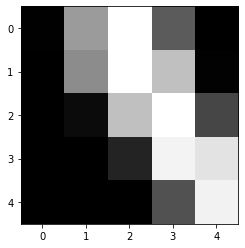

In [78]:
# Plot the image by passing in the 28x28 matrix
plt.imshow(img_tensor[0,10:15,10:15], cmap='gray');

Note that we need to pass just the $28\times 28$ matrix to `plt.imshow` without a channel dimension. We also pass a color map (cmap='gray') to indicate that we want to see a grayscale image.

### Training and validation datasets

While building real-world machine learning models, it is quite common to split the dataset into three parts:

1. **Training set:** used to train the model, i.e., compute the loss and adjust the model's weights using gradient descent
1. **Validation set:** used to evaluate the model during training, adjust hyperparameters (learning rate, etc.), and pick the best version of the model
1. **Test set:** used to compare different models or approaches and report the model's final accuracy

In the MNIST dataset, there are 60,000 training images and 10,000 test images. The test set is standardized so that different researchers can report their models' results against the same collection of images.

Since there's no predefined validation set, we must manually split the 60,000 images into training and validation datasets. Let's set aside 10,000 randomly chosen images for validation. We can do this using the `random_spilt` method from PyTorch.

In [79]:
from torch.utils.data import random_split

train_ds, val_ds = random_split(dataset, [50000, 10000])
len(train_ds), len(val_ds)

(50000, 10000)

It's essential to choose a random sample for creating a validation set. Training data is often sorted by the target labels, i.e., images of 0s, followed by 1s, followed by 2s, etc. If we create a validation set using the last 20% of images, it would only consist of 8s and 9s. In contrast, the training set would contain no 8s or 9s. Such a training-validation would make it impossible to train a useful model.

We can now create data loaders to help us load the data in batches. We'll use a batch size of 128:

In [80]:
from torch.utils.data import DataLoader

batch_size = 128

train_loader = DataLoader(train_ds, batch_size, shuffle=True)
val_loader = DataLoader(val_ds, batch_size)

We set `shuffle=True` for the training data loader to ensure that the batches generated in each epoch are different. This randomization helps generalize and speed up the training process. On the other hand, since the validation data loader is used only for evaluating the model, there is no need to shuffle the images.

### Classification model
Now that we have prepared our data loaders, we can define our model.

* A logistic regression model is almost identical to a linear regression model. It contains weights and bias matrices, and the output is obtained using simple matrix operations ($\text{pred} = x @ w.t() + b$).
* As we did with linear regression, we can use `nn.Linear` to create the model instead of manually creating and initializing the matrices.
* Since `nn.Linear` expects each training example to be a vector, each $1\times 28\times 28$ image tensor is flattened into a vector of size 784 (28*28) before being passed into the model.
* The output for each image is a vector of size 10, with each element signifying the probability of a particular target label (i.e., 0 to 9). The predicted label for an image is simply the one with the highest probability.

In [81]:
import torch.nn as nn

input_size = 28*28
num_classes = 10

# Logistic regression model
model = nn.Linear(input_size, num_classes)

Of course, this model is a lot larger than our previous model in terms of the number of parameters. Let's take a look at the weights and biases:

In [82]:
print(model.weight.shape)
model.weight

torch.Size([10, 784])


Parameter containing:
tensor([[ 0.0056, -0.0133,  0.0073,  ..., -0.0300,  0.0189, -0.0144],
        [-0.0329,  0.0054, -0.0106,  ...,  0.0153,  0.0034,  0.0231],
        [ 0.0311, -0.0242,  0.0236,  ..., -0.0188,  0.0117,  0.0200],
        ...,
        [-0.0331,  0.0239, -0.0146,  ..., -0.0341, -0.0273,  0.0074],
        [-0.0013, -0.0091,  0.0243,  ...,  0.0001, -0.0309, -0.0021],
        [-0.0033,  0.0245,  0.0337,  ...,  0.0339, -0.0330,  0.0207]],
       requires_grad=True)

In [83]:
print(model.bias.shape)
model.bias

torch.Size([10])


Parameter containing:
tensor([ 0.0277,  0.0280, -0.0240, -0.0009, -0.0142, -0.0101,  0.0130, -0.0113,
         0.0248,  0.0104], requires_grad=True)

Although there are a total of 7850 parameters here, conceptually, nothing has changed so far. Let's try and generate some outputs using our model. We'll take the first batch of 100 images from our dataset and pass them into our model.

In [84]:
for images, labels in train_loader:
    print(labels)
    print(images.shape)
    outputs = model(images)
    print(outputs)
    break

tensor([3, 0, 0, 6, 6, 0, 5, 4, 1, 4, 2, 3, 4, 1, 6, 8, 9, 3, 9, 5, 2, 5, 5, 9,
        0, 2, 4, 8, 4, 9, 7, 4, 4, 9, 6, 1, 7, 6, 2, 4, 7, 4, 7, 4, 5, 6, 6, 9,
        1, 7, 4, 2, 3, 5, 8, 0, 7, 3, 6, 1, 6, 8, 0, 5, 6, 4, 9, 4, 4, 7, 3, 3,
        6, 4, 6, 0, 0, 6, 7, 0, 2, 7, 1, 6, 0, 6, 3, 3, 0, 9, 5, 6, 7, 7, 7, 1,
        2, 2, 1, 7, 2, 9, 5, 6, 2, 5, 1, 8, 4, 0, 4, 0, 1, 7, 8, 9, 5, 4, 5, 1,
        7, 1, 3, 2, 4, 4, 1, 3])
torch.Size([128, 1, 28, 28])


RuntimeError: mat1 and mat2 shapes cannot be multiplied (3584x28 and 784x10)

In [85]:
images.shape

torch.Size([128, 1, 28, 28])

In [86]:
images.reshape(128, 784).shape

torch.Size([128, 784])

The code above leads to an error because our input data does not have the right shape. Our images are of the shape $1\times 28\times 28$, but we need them to be vectors of size 784, i.e., we need to flatten them. We'll use the `.reshape` method of a tensor, which will allow us to efficiently 'view' each image as a flat vector without really creating a copy of the underlying data. To include this additional functionality within our model, we need to define a custom model by extending the `nn.Module` class from PyTorch.

A [class in Python](https://www.w3schools.com/python/python_classes.asp) provides a "blueprint" for creating objects. Let's look at an example of defining a new class in Python:

In [87]:
class Person:
    # Class constructor
    def __init__(self, name, age):
        # Object properties
        self.name = name
        self.age = age
    
    # Method
    def say_hello(self):
        print("Hello my name is " + self.name + "!")

Here's how we create or instantiate an object of the class Person:

In [88]:
bob = Person("Bob", 32)

The object `bob` is an instance of the class `Person`.

We can access the object's properties (also called attributes) or invoke its methods using the `.` notation:

In [89]:
bob.name, bob.age

('Bob', 32)

In [90]:
bob.say_hello()

Hello my name is Bob!


Classes can also build upon or extend the functionality of existing classes. Let's extend the `nn.Module` class from PyTorch to define a custom model:

In [91]:
class MnistModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(input_size, num_classes)
        
    def forward(self, xb):
        xb = xb.reshape(-1, 784)
        out = self.linear(xb)
        return out
    
model = MnistModel()

Inside the `__init__` constructor method, we instantiate the weights and biases using `nn.Linear`, and inside the forward method, which is invoked when we pass a batch of inputs to the model, we flatten the input tensor and pass it into `self.linear`.

`xb.reshape(-1, 28*28)` indicates to PyTorch that we want a view of the `xb` tensor with two dimensions. The length along the 2nd dimension is 28*28 (i.e., 784). One argument to `.reshape` can be set to $-1$ (in this case, the first dimension) to let PyTorch figure it out automatically based on the shape of the original tensor.

Note that the model no longer has `.weight` and `.bias` attributes (as they are now inside the `.linear` attribute), but it does have a `.parameters` method that returns a list containing the weights and bias.

In [92]:
model.linear

Linear(in_features=784, out_features=10, bias=True)

In [93]:
print(model.linear.weight.shape, model.linear.bias.shape)
list(model.parameters())

torch.Size([10, 784]) torch.Size([10])


[Parameter containing:
 tensor([[ 0.0134, -0.0169, -0.0139,  ..., -0.0273,  0.0088,  0.0275],
         [-0.0126,  0.0038, -0.0049,  ...,  0.0167, -0.0325, -0.0232],
         [ 0.0045,  0.0096,  0.0266,  ...,  0.0209, -0.0155,  0.0336],
         ...,
         [-0.0235, -0.0110,  0.0094,  ..., -0.0220,  0.0130, -0.0218],
         [ 0.0105,  0.0181, -0.0058,  ..., -0.0232,  0.0199,  0.0220],
         [ 0.0078,  0.0260, -0.0077,  ..., -0.0331, -0.0038, -0.0040]],
        requires_grad=True),
 Parameter containing:
 tensor([-0.0032,  0.0193, -0.0295, -0.0244,  0.0054, -0.0016,  0.0305, -0.0076,
         -0.0037, -0.0148], requires_grad=True)]

We can use our new custom model in the same way as before. Let's see if it works:

In [94]:
for images, labels in train_loader:
    print(images.shape)
    outputs = model(images)
    break

print('outputs.shape : ', outputs.shape)
print('Sample outputs :\n', outputs[:2].data)

torch.Size([128, 1, 28, 28])
outputs.shape :  torch.Size([128, 10])
Sample outputs :
 tensor([[ 0.0962, -0.2038, -0.5464,  0.0932,  0.0128, -0.2761,  0.0743, -0.2320,
         -0.0612, -0.0279],
        [-0.0692,  0.2250, -0.1375, -0.4630,  0.2139,  0.1029,  0.1230, -0.0630,
         -0.2824,  0.3581]])


<div>
<img src="notebook_images\softmax_formula.png" align="right" width="250"/>
</div>
For each of the 100 input images, we get 10 outputs, one for each class. As discussed earlier, we'd like these outputs to represent probabilities. Each output row's elements must lie between 0 to 1 and add up to 1, which is not the case.

To convert the output rows into probabilities, we use the softmax function, which has the formula shown in the figure. 
While it's easy to implement the softmax function (you should try it!), we'll use the implementation that's provided within PyTorch because it works well with multidimensional tensors (a list of output rows in our case).

In [95]:
import torch.nn.functional as F

The softmax function is included in the `torch.nn.functional` package and requires us to specify a dimension along which the function should be applied:

In [96]:
outputs[:2]

tensor([[ 0.0962, -0.2038, -0.5464,  0.0932,  0.0128, -0.2761,  0.0743, -0.2320,
         -0.0612, -0.0279],
        [-0.0692,  0.2250, -0.1375, -0.4630,  0.2139,  0.1029,  0.1230, -0.0630,
         -0.2824,  0.3581]], grad_fn=<SliceBackward>)

In [97]:
# Apply softmax for each output row
probs = F.softmax(outputs, dim=1)

# Look at sample probabilities
print("Sample probabilities:\n", probs[:2].data)

# Add up the probabilities of an output row
print("Sum: ", torch.sum(probs[0]).item())

Sample probabilities:
 tensor([[0.1204, 0.0892, 0.0633, 0.1200, 0.1107, 0.0829, 0.1177, 0.0867, 0.1028,
         0.1063],
        [0.0907, 0.1217, 0.0847, 0.0612, 0.1204, 0.1077, 0.1099, 0.0913, 0.0733,
         0.1391]])
Sum:  0.9999999403953552


Finally, we can determine the predicted label for each image by simply choosing the index of the element with the highest probability in each output row. We can do this using $\text{torch.max}$, which returns each row's largest element and the corresponding index:

In [98]:
max_probs, preds = torch.max(probs, dim=1)
print(preds)
print(max_probs)

tensor([0, 9, 4, 0, 6, 6, 5, 4, 0, 4, 5, 5, 5, 7, 5, 5, 1, 6, 4, 5, 4, 6, 5, 5,
        4, 5, 4, 9, 5, 4, 6, 9, 6, 5, 9, 9, 9, 5, 4, 5, 5, 5, 5, 5, 5, 6, 5, 5,
        5, 6, 5, 6, 9, 6, 8, 4, 5, 9, 4, 0, 5, 6, 4, 6, 5, 0, 6, 4, 6, 9, 4, 4,
        9, 5, 5, 4, 5, 9, 4, 4, 5, 5, 9, 5, 4, 5, 4, 1, 6, 6, 4, 4, 5, 4, 5, 6,
        6, 6, 5, 6, 9, 5, 5, 1, 5, 8, 5, 6, 4, 6, 0, 5, 9, 5, 4, 4, 6, 4, 5, 5,
        5, 4, 4, 4, 5, 9, 5, 6])
tensor([0.1204, 0.1391, 0.1398, 0.1457, 0.1269, 0.1305, 0.1410, 0.1440, 0.1126,
        0.1253, 0.1422, 0.1336, 0.1893, 0.1402, 0.1219, 0.1341, 0.1212, 0.1420,
        0.1407, 0.1375, 0.1651, 0.1259, 0.1293, 0.1441, 0.1287, 0.1233, 0.1540,
        0.1271, 0.1739, 0.1348, 0.1271, 0.1407, 0.1280, 0.1193, 0.1382, 0.1482,
        0.1216, 0.1290, 0.1282, 0.1355, 0.1389, 0.1491, 0.1353, 0.1212, 0.1345,
        0.1238, 0.1338, 0.1228, 0.1623, 0.1208, 0.1405, 0.1338, 0.1374, 0.1315,
        0.1192, 0.1282, 0.1622, 0.1386, 0.1418, 0.1401, 0.1448, 0.1255, 0.1275,
       

The numbers printed above are the predicted labels for the first batch of training images. Let's compare them with the actual labels:

In [99]:
labels

tensor([6, 8, 9, 7, 7, 6, 3, 7, 7, 4, 8, 2, 2, 8, 9, 3, 0, 9, 9, 4, 4, 6, 9, 2,
        7, 0, 9, 5, 2, 9, 1, 6, 1, 3, 6, 2, 0, 9, 1, 4, 2, 4, 8, 0, 7, 2, 0, 3,
        8, 4, 0, 8, 6, 0, 3, 9, 0, 9, 3, 3, 3, 1, 2, 8, 0, 0, 6, 7, 1, 6, 9, 1,
        0, 8, 8, 4, 2, 2, 7, 8, 3, 5, 8, 8, 1, 3, 7, 9, 1, 2, 7, 1, 2, 5, 6, 5,
        1, 1, 5, 1, 6, 0, 2, 7, 8, 4, 5, 3, 1, 1, 5, 7, 6, 2, 1, 1, 8, 7, 2, 5,
        5, 3, 0, 4, 4, 5, 2, 7])

Most of the predicted labels are different from the actual labels. That's because we have started with randomly initialized weights and biases. We need to train the model, i.e., adjust the weights using gradient descent to make better predictions.

### Evaluation metric and loss function
Just as with linear regression, we need a way to evaluate how well our model is performing. A natural way to do this would be to find the percentage of labels that were predicted correctly, i.e,. the accuracy of the predictions.

In [100]:
outputs[:2]

tensor([[ 0.0962, -0.2038, -0.5464,  0.0932,  0.0128, -0.2761,  0.0743, -0.2320,
         -0.0612, -0.0279],
        [-0.0692,  0.2250, -0.1375, -0.4630,  0.2139,  0.1029,  0.1230, -0.0630,
         -0.2824,  0.3581]], grad_fn=<SliceBackward>)

In [101]:
torch.sum(preds == labels)

tensor(14)

In [102]:
def accuracy(outputs, labels):
    _, preds = torch.max(outputs, dim=1)
    return torch.tensor(torch.sum(preds == labels).item() / len(preds))

The `==` operator performs an element-wise comparison of two tensors with the same shape and returns a tensor of the same shape, containing `True` for unequal elements and $\text{False}$ for equal elements. Passing the result to `torch.sum` returns the number of labels that were predicted correctly. Finally, we divide by the total number of images to get the accuracy.

Note that we don't need to apply softmax to the outputs since its results have the same relative order. This is because $e^x$ is an increasing function, i.e., if $y_1 > y_2$, then $e^{y_1} > e^{y_2}$. The same holds after averaging out the values to get the softmax.

Let's calculate the accuracy of the current model on the first batch of data:

In [103]:
accuracy(outputs, labels)

tensor(0.1094)

In [104]:
probs

tensor([[0.1204, 0.0892, 0.0633,  ..., 0.0867, 0.1028, 0.1063],
        [0.0907, 0.1217, 0.0847,  ..., 0.0913, 0.0733, 0.1391],
        [0.0927, 0.0865, 0.0767,  ..., 0.0959, 0.0855, 0.1063],
        ...,
        [0.0992, 0.0826, 0.1171,  ..., 0.1060, 0.0766, 0.1228],
        [0.1194, 0.0677, 0.0837,  ..., 0.0972, 0.0681, 0.1221],
        [0.1095, 0.1088, 0.1005,  ..., 0.0856, 0.0993, 0.0949]],
       grad_fn=<SoftmaxBackward>)

Accuracy is an excellent way for us (humans) to evaluate the model. However, we can't use it as a loss function for optimizing our model using gradient descent for the following reasons:

1. It's not a differentiable function. `torch.max` and `==` are both non-continuous and non-differentiable operations, so we can't use the accuracy for computing gradients w.r.t the weights and biases.
1. It doesn't take into account the actual probabilities predicted by the model, so it can't provide sufficient feedback for incremental improvements.

<div>
<img src="notebook_images\cross_entropy.png" align="middle" width="250"/>
</div>

Thus, accuracy is often used as an evaluation metric for classification, but not as a loss function. A commonly used loss function for classification problems is the cross-entropy, which has the formula shown in the picture. While it looks complicated, it's actually quite simple:

1. For each output row, pick the predicted probability for the correct label, e.g., if the predicted probabilities for an image are $[0.1, 0.3, 0.2, ...]$ and the correct label is 1, we pick the corresponding element 0.3 and ignore the rest.
1. Take the logarithm of the picked probability: If the probability is high, i.e., close to 1, then its logarithm is a very small negative value, close to 0, and if the probability is low (close to 0), then the logarithm is a very large negative value. We also multiply the result by $-1$, which results is a large postive value of the loss for poor predictions.
1. Take the average of the cross entropy across all the output rows to get the overall loss for a batch of data.

Unlike accuracy, cross-entropy is a continuous and differentiable function. It also provides useful feedback for incremental improvements in the model (a slightly higher probability for the correct label leads to a lower loss). These two factors make cross-entropy a better choice for the loss function.

As you might expect, PyTorch provides an efficient and tensor-friendly implementation of cross-entropy as part of the `torch.nn.functional` package. Moreover, it also performs softmax internally, so we can directly pass in the model's outputs without converting them into probabilities.

In [105]:
outputs

tensor([[ 0.0962, -0.2038, -0.5464,  ..., -0.2320, -0.0612, -0.0279],
        [-0.0692,  0.2250, -0.1375,  ..., -0.0630, -0.2824,  0.3581],
        [-0.1548, -0.2232, -0.3443,  ..., -0.1206, -0.2348, -0.0179],
        ...,
        [ 0.0372, -0.1450,  0.2033,  ...,  0.1040, -0.2204,  0.2509],
        [ 0.0834, -0.4838, -0.2723,  ..., -0.1226, -0.4782,  0.1051],
        [ 0.0226,  0.0162, -0.0624,  ..., -0.2233, -0.0745, -0.1200]],
       grad_fn=<AddmmBackward>)

In [106]:
loss_fn = F.cross_entropy

In [107]:
# Loss for current batch of data
loss = loss_fn(outputs, labels)
print(loss)

tensor(2.3263, grad_fn=<NllLossBackward>)


We know that cross-entropy is the negative logarithm of the predicted probability of the correct label averaged over all training samples. Therefore, one way to interpret the resulting number e.g. $2.23$ is look at $e^{-2.23}$ which is around 0.1 as the predicted probability of the correct label, on average. The lower the loss, The better the model.

### Training the model
Now that we have defined the data loaders, model, loss function and optimizer, we are ready to train the model. The training process is identical to linear regression, with the addition of a "validation phase" to evaluate the model in each epoch. Here's what it looks like in pseudocode:

        for epoch in range(num_epochs):
            # Training phase
            for batch in train_loader:
                # Generate predictions
                # Calculate loss
                # Compute gradients
                # Update weights
                # Reset gradients
            # Validation phase
            for batch in val_loader:
                # Generate predictions
                # Calculate loss
                # Calculate metrics (accuracy etc.)
            # Calculate average validation loss & metrics
            # Log epoch, loss & metrics for inspection
    
Some parts of the training loop are specific the specific problem we're solving (e.g. loss function, metrics etc.) whereas others are generic and can be applied to any deep learning problem.

We'll include the problem-independent parts within a function called `fit`, which will be used to train the model. The problem-specific parts will be implemented by adding new methods to the nn.Module class.

In [108]:
def fit(epochs, lr, model, train_loader, val_loader, opt_func=torch.optim.SGD):
    optimizer = opt_func(model.parameters(), lr)
    history = [] # for recording epoch-wise results
    
    for epoch in range(epochs):
        
        # Training Phase 
        for batch in train_loader:
            loss = model.training_step(batch)
            loss.backward()
            optimizer.step()
            optimizer.zero_grad()
        
        # Validation phase
        result = evaluate(model, val_loader)
        model.epoch_end(epoch, result)
        history.append(result)

    return history

The `fit` function records the validation loss and metric from each epoch. It returns a history of the training, useful for debugging & visualization.

Configurations like batch size, learning rate, etc. (called hyperparameters), need to picked in advance while training machine learning models. Choosing the right hyperparameters is critical for training a reasonably accurate model within a reasonable amount of time. It is an active area of research and experimentation in machine learning. Feel free to try different learning rates and see how it affects the training process.

Let's define the `evaluate` function, used in the validation phase of `fit`:

In [109]:
l1 = [1, 2, 3, 4, 5]

In [110]:
l2 = [x*2 for x in l1]
l2

[2, 4, 6, 8, 10]

In [111]:
def evaluate(model, val_loader):
    outputs = [model.validation_step(batch) for batch in val_loader]
    return model.validation_epoch_end(outputs)

Finally, let's redefine the `MnistModel` class to include additional methods `training_step`, `validation_step`, `validation_epoch_end`, and `epoch_end` used by `fit` and `evaluate`:

In [112]:
class MnistModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(input_size, num_classes)
        
    def forward(self, xb):
        xb = xb.reshape(-1, 784)
        out = self.linear(xb)
        return out
    
    def training_step(self, batch):
        images, labels = batch 
        out = self(images)                  # Generate predictions
        loss = F.cross_entropy(out, labels) # Calculate loss
        return loss
    
    def validation_step(self, batch):
        images, labels = batch 
        out = self(images)                    # Generate predictions
        loss = F.cross_entropy(out, labels)   # Calculate loss
        acc = accuracy(out, labels)           # Calculate accuracy
        return {'val_loss': loss, 'val_acc': acc}
        
    def validation_epoch_end(self, outputs):
        batch_losses = [x['val_loss'] for x in outputs]
        epoch_loss = torch.stack(batch_losses).mean()   # Combine losses
        batch_accs = [x['val_acc'] for x in outputs]
        epoch_acc = torch.stack(batch_accs).mean()      # Combine accuracies
        return {'val_loss': epoch_loss.item(), 'val_acc': epoch_acc.item()}
    
    def epoch_end(self, epoch, result):
        print("Epoch [{}], val_loss: {:.4f}, val_acc: {:.4f}".format(epoch, result['val_loss'], result['val_acc']))
    
model = MnistModel()

Before we train the model, let's see how the model performs on the validation set with the initial set of randomly initialized weights and biases:

In [113]:
result0 = evaluate(model, val_loader)
result0

{'val_loss': 2.3467838764190674, 'val_acc': 0.05903876572847366}

The initial accuracy is around $10%$, which one might expect from a randomly initialized model (since it has a 1 in 10 chance of getting a label right by guessing randomly).

We are now ready to train the model. Let's train for five epochs and look at the results:

In [114]:
history1 = fit(5, 0.001, model, train_loader, val_loader)

Epoch [0], val_loss: 1.9730, val_acc: 0.6417
Epoch [1], val_loss: 1.6960, val_acc: 0.7380
Epoch [2], val_loss: 1.4884, val_acc: 0.7691
Epoch [3], val_loss: 1.3316, val_acc: 0.7857
Epoch [4], val_loss: 1.2115, val_acc: 0.8025


That's a great result! With just 5 epochs of training, our model has reached an accuracy of over 80% on the validation set. Let's see if we can improve that by training for a few more epochs. Try changing the learning rates and number of epochs in each of the cells below:

In [115]:
history2 = fit(5, 0.001, model, train_loader, val_loader)

Epoch [0], val_loss: 1.1173, val_acc: 0.8115
Epoch [1], val_loss: 1.0419, val_acc: 0.8199
Epoch [2], val_loss: 0.9804, val_acc: 0.8244
Epoch [3], val_loss: 0.9295, val_acc: 0.8278
Epoch [4], val_loss: 0.8865, val_acc: 0.8311


In [116]:
history3 = fit(5, 0.001, model, train_loader, val_loader)

Epoch [0], val_loss: 0.8497, val_acc: 0.8355
Epoch [1], val_loss: 0.8180, val_acc: 0.8384
Epoch [2], val_loss: 0.7902, val_acc: 0.8409
Epoch [3], val_loss: 0.7658, val_acc: 0.8436
Epoch [4], val_loss: 0.7440, val_acc: 0.8458


In [117]:
history4 = fit(5, 0.001, model, train_loader, val_loader)

Epoch [0], val_loss: 0.7246, val_acc: 0.8477
Epoch [1], val_loss: 0.7070, val_acc: 0.8504
Epoch [2], val_loss: 0.6911, val_acc: 0.8515
Epoch [3], val_loss: 0.6766, val_acc: 0.8531
Epoch [4], val_loss: 0.6634, val_acc: 0.8546


While the accuracy does continue to increase as we train for more epochs, the improvements get smaller with every epoch. Let's visualize this using a line graph:

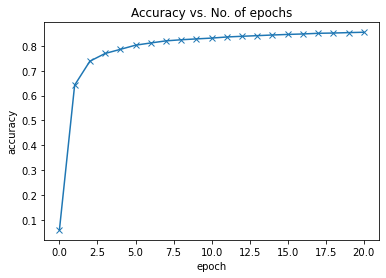

In [118]:
history = [result0] + history1 + history2 + history3 + history4
accuracies = [result['val_acc'] for result in history]
plt.plot(accuracies, '-x')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.title('Accuracy vs. No. of epochs');

It's quite clear from the above picture that the model probably won't cross the accuracy threshold of 90% even after training for a very long time. One possible reason for this is that the learning rate might be too high. The model's parameters may be "bouncing" around the optimal set of parameters for the lowest loss. You can try reducing the learning rate and training for a few more epochs to see if it helps.

However, the more likely reason that the model just isn't powerful enough: If you remember our initial hypothesis, we have assumed that the output (in this case the class probabilities) is a linear function of the input (pixel intensities), obtained by perfoming a matrix multiplication with the weights matrix and adding the bias. This is a fairly weak assumption, as there may not actually exist a linear relationship between the pixel intensities in an image and the digit it represents. While it works reasonably well for a simple dataset like MNIST (getting us to 85% accuracy), we need more sophisticated models that can capture non-linear relationships between image pixels and labels for complex tasks like recognizing everyday objects, animals etc.

### Testing with individual images
While we have been tracking the overall accuracy of a model so far, it's also a good idea to look at model's results on some sample images. Let's test out our model with some images from the predefined test dataset of 10000 images. We begin by recreating the test dataset with the `ToTensor` transform:

In [119]:
# Define test dataset
test_dataset = MNIST(root='data/', 
                     train=False,
                     transform=transforms.ToTensor())

Here's a sample image from the dataset:

Shape: torch.Size([1, 28, 28])
Label: 9


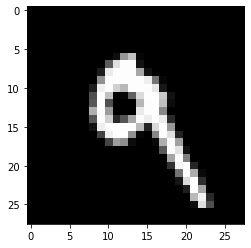

In [120]:
img, label = test_dataset[7]
plt.imshow(img[0], cmap='gray')
print('Shape:', img.shape)
print('Label:', label)

Let's define a helper function `predict_image`, which returns the predicted label for a single image tensor:

In [121]:
def predict_image(img, model):
    xb = img.unsqueeze(0)
    yb = model(xb)
    _, preds = torch.max(yb, dim=1)
    return preds[0].item()

`img.unsqueeze` simply adds another dimension at the begining of the $1\times 28\times 28$ tensor, making it a $1\times 1\times 28\times 28$ tensor, which the model views as a batch containing a single image.

Let's try it out with a few images:

Label: 9 , Predicted: 9


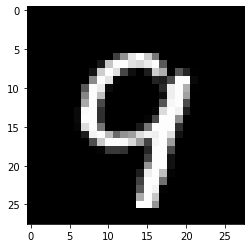

In [122]:
img, label = test_dataset[16]
plt.imshow(img[0], cmap='gray')
print('Label:', label, ', Predicted:', predict_image(img, model))

Label: 9 , Predicted: 9


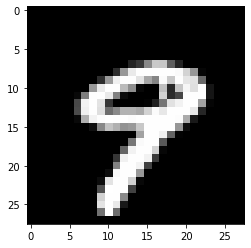

In [123]:
img, label = test_dataset[9]
plt.imshow(img[0], cmap='gray')
print('Label:', label, ', Predicted:', predict_image(img, model))

Label: 9 , Predicted: 4


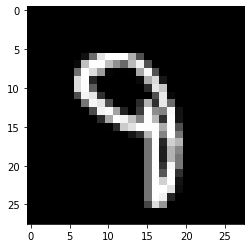

In [124]:
img, label = test_dataset[193]
plt.imshow(img[0], cmap='gray')
print('Label:', label, ', Predicted:', predict_image(img, model))

Identifying where our model performs poorly can help us improve the model, by collecting more training data, increasing/decreasing the complexity of the model, and changing the hypeparameters.

As a final step, let's also look at the overall loss and accuracy of the model on the test set:

In [125]:
test_loader = DataLoader(test_dataset, batch_size=256)
result = evaluate(model, test_loader)
result

{'val_loss': 0.6410952806472778, 'val_acc': 0.861132800579071}

We expect this to be similar to the accuracy/loss on the validation set. If not, we might need a better validation set that has similar data and distribution as the test set (which often comes from real world data).

### Saving and loading the model
Since we've trained our model for a long time and achieved a resonable accuracy, it would be a good idea to save the weights and bias matrices to disk, so that we can reuse the model later and avoid retraining from scratch. Here's how you can save the model:

In [126]:
torch.save(model.state_dict(), 'mnist-logistic.pth')

The `.state_dict` method returns an `OrderedDict` containing all the weights and bias matrices mapped to the right attributes of the model.

In [127]:
model.state_dict()

OrderedDict([('linear.weight',
              tensor([[-3.3670e-02,  2.7338e-02, -2.2787e-02,  ...,  2.1268e-02,
                        4.0593e-03, -5.7152e-03],
                      [-3.2801e-02,  2.6852e-02,  2.5100e-02,  ..., -9.6706e-03,
                        2.3895e-02, -3.1268e-02],
                      [ 5.2986e-03, -3.1599e-02,  3.0131e-02,  ..., -3.9037e-03,
                        3.4052e-02,  1.7060e-03],
                      ...,
                      [ 2.2328e-02, -6.9669e-03, -7.5568e-05,  ...,  3.2013e-02,
                       -1.6588e-02, -3.0975e-02],
                      [ 2.1673e-03,  2.5406e-02,  5.9726e-03,  ...,  2.2273e-02,
                       -3.2340e-02,  2.1077e-02],
                      [-6.4564e-03, -2.4341e-02,  3.2429e-03,  ..., -2.1772e-02,
                       -4.2590e-03,  1.5545e-02]])),
             ('linear.bias',
              tensor([-0.0320,  0.0822, -0.0447, -0.0620,  0.0361,  0.0327, -0.0331,  0.0615,
                      -0.1034,

To load the model weights, we can instante a new object of the class `MnistModel`, and use the `.load_state_dict` method.

In [128]:
model2 = MnistModel()

In [129]:
model2.state_dict()

OrderedDict([('linear.weight',
              tensor([[ 0.0189, -0.0194,  0.0112,  ...,  0.0316,  0.0224,  0.0012],
                      [-0.0255, -0.0348,  0.0171,  ..., -0.0228,  0.0337,  0.0279],
                      [ 0.0049, -0.0219,  0.0238,  ..., -0.0157, -0.0319,  0.0080],
                      ...,
                      [ 0.0181, -0.0102, -0.0073,  ..., -0.0229,  0.0152,  0.0335],
                      [-0.0161, -0.0262,  0.0201,  ..., -0.0222,  0.0323,  0.0158],
                      [ 0.0066, -0.0028,  0.0013,  ..., -0.0347, -0.0147, -0.0019]])),
             ('linear.bias',
              tensor([ 0.0155, -0.0050,  0.0192, -0.0060, -0.0174, -0.0220,  0.0141,  0.0026,
                       0.0205,  0.0264]))])

In [130]:
evaluate(model2, test_loader)

{'val_loss': 2.3090553283691406, 'val_acc': 0.0673828125}

In [131]:
model2.load_state_dict(torch.load('mnist-logistic.pth'))
model2.state_dict()

OrderedDict([('linear.weight',
              tensor([[-3.3670e-02,  2.7338e-02, -2.2787e-02,  ...,  2.1268e-02,
                        4.0593e-03, -5.7152e-03],
                      [-3.2801e-02,  2.6852e-02,  2.5100e-02,  ..., -9.6706e-03,
                        2.3895e-02, -3.1268e-02],
                      [ 5.2986e-03, -3.1599e-02,  3.0131e-02,  ..., -3.9037e-03,
                        3.4052e-02,  1.7060e-03],
                      ...,
                      [ 2.2328e-02, -6.9669e-03, -7.5568e-05,  ...,  3.2013e-02,
                       -1.6588e-02, -3.0975e-02],
                      [ 2.1673e-03,  2.5406e-02,  5.9726e-03,  ...,  2.2273e-02,
                       -3.2340e-02,  2.1077e-02],
                      [-6.4564e-03, -2.4341e-02,  3.2429e-03,  ..., -2.1772e-02,
                       -4.2590e-03,  1.5545e-02]])),
             ('linear.bias',
              tensor([-0.0320,  0.0822, -0.0447, -0.0620,  0.0361,  0.0327, -0.0331,  0.0615,
                      -0.1034,

Just as a sanity check, let's verify that this model has the same loss and accuracy on the test set as before:

In [132]:
test_loader = DataLoader(test_dataset, batch_size=256)
result = evaluate(model2, test_loader)
result

{'val_loss': 0.6410952806472778, 'val_acc': 0.861132800579071}